In [2]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import math
import itertools
from math import log2
# import ipympl

In [3]:
# %matplotlib widget

In [4]:
WT = np.array([60, 150, 230])
print(WT)
DT = np.array([1000, 1600, 2200])
print(DT)

[ 60 150 230]
[1000 1600 2200]


In [5]:
combinations = list(itertools.product(WT, DT))
print(combinations)

[(60, 1000), (60, 1600), (60, 2200), (150, 1000), (150, 1600), (150, 2200), (230, 1000), (230, 1600), (230, 2200)]


In [6]:
combinations_np = np.asarray(combinations)
print(combinations_np[:,1])

[1000 1600 2200 1000 1600 2200 1000 1600 2200]


In [7]:
slices = combinations_np[:,0]/combinations_np[:,1]
print(1/slices)

[16.66666667 26.66666667 36.66666667  6.66666667 10.66666667 14.66666667
  4.34782609  6.95652174  9.56521739]


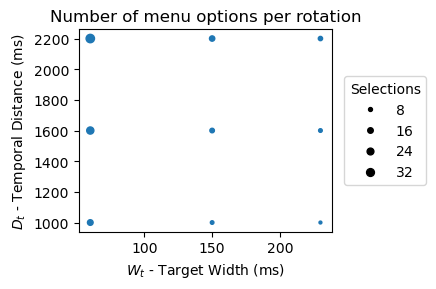

In [8]:
# Plot difficulty range
plt.figure(figsize=(5,3))
sc = plt.scatter(combinations_np[:,0], combinations_np[:,1],  s=1/slices)
plt.title('Number of menu options per rotation')
plt.xlabel('$W_{t}$ - Target Width (ms)')
plt.ylabel('$D_{t}$ - Temporal Distance (ms)')
plt.set_cmap('RdYlGn_r')
# cbar = plt.colorbar()
# cbar.set_label('Selections possible')
# plt.xlim((40, 250))
# plt.ylim((900, 2300))
plt.legend(*sc.legend_elements("sizes", num=5), title='Selections', loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.tight_layout()
plt.savefig('selections_rotations.png', dpi=500, bbox_inches="tight")
plt.show()

In [9]:
N = np.array([2, 4, 8, 16, 32])
P = np.arange(1, 100, 1)/100



In [10]:
print(np.shape(N)[0])
print(np.shape(P))
B = np.empty((np.shape(N)[0], np.shape(P)[0]))


5
(99,)


In [11]:

for idx, n in enumerate(N):
    print(idx)
    B[idx] = np.log2(n) +P*np.log2(P) + (1-P)*np.log2((1-P)/(n-1))
# Q = S/T

0
1
2
3
4


In [12]:
print(B[4])

[1.45525168e-02 3.44707328e-03 3.77210932e-05 1.67935295e-03
 7.11654802e-03 1.56105491e-02 2.66737804e-02 3.99602042e-02
 5.52115405e-02 7.22277271e-02 9.08493256e-02 1.10946382e-01
 1.32411025e-01 1.55152361e-01 1.79092831e-01 2.04165545e-01
 2.30312284e-01 2.57481980e-01 2.85629529e-01 3.14714857e-01
 3.44702175e-01 3.75559375e-01 4.07257537e-01 4.39770525e-01
 4.73074643e-01 5.07148358e-01 5.41972057e-01 5.77527846e-01
 6.13799373e-01 6.50771683e-01 6.88431087e-01 7.26765051e-01
 7.65762099e-01 8.05411730e-01 8.45704343e-01 8.86631172e-01
 9.28184232e-01 9.70356265e-01 1.01314070e+00 1.05653162e+00
 1.10052371e+00 1.14511224e+00 1.19029307e+00 1.23606254e+00
 1.28241758e+00 1.32935555e+00 1.37687437e+00 1.42497238e+00
 1.47364844e+00 1.52290184e+00 1.57273237e+00 1.62314024e+00
 1.67412615e+00 1.72569126e+00 1.77783721e+00 1.83056610e+00
 1.88388055e+00 1.93778365e+00 1.99227904e+00 2.04737088e+00
 2.10306389e+00 2.15936338e+00 2.21627527e+00 2.27380614e+00
 2.33196324e+00 2.390754

In [13]:
np.argwhere(B ==0)

array([[ 0, 49],
       [ 1, 24]], dtype=int64)

In [14]:
B[0,:49] = np.nan
B[1,:24] = np.nan
B[2,:12] = np.nan
B[3,:6] = np.nan
B[4,:3] = np.nan

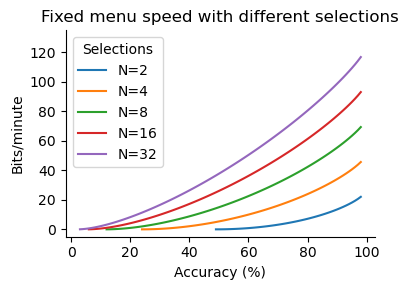

In [19]:
fig, axs = plt.subplots(1, figsize=(4,3))
plt.plot(B[0]*24, label='N=2')
plt.plot(B[1]*24, label='N=4')
plt.plot(B[2]*24, label='N=8')
plt.plot(B[3]*24, label='N=16')
plt.plot(B[4]*24, label='N=32')

plt.xlabel('Accuracy (%)')
plt.ylabel('Bits/minute')
plt.legend(title='Selections', loc='upper left')
plt.title('Fixed menu speed with different selections')
# # set the twin axis
# ax_twin = axs.twinx()
# ax_twin.set_ylabel('Bits/minute')
# trials_per_min = lambda amp: amp*24
# ymin, ymax = axs.get_ylim()
# ax_twin.set_ylim((trials_per_min(ymin),trials_per_min(ymax)))
# ax_twin.spines['top'].set_visible(False)
# ax_twin.plot([],[])

axs.set_ylim([-5, 135])
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('bits_min.png', dpi=500, bbox_inches="tight")
plt.show()


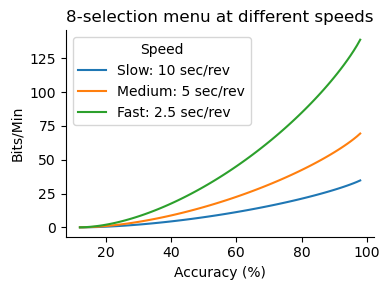

In [20]:
fig, axs = plt.subplots(1, figsize=(4,3))

plt.plot(B[2]*12, label='Slow: 10 sec/rev')
plt.plot(B[2]*24, label='Medium: 5 sec/rev')
plt.plot(B[2]*48, label='Fast: 2.5 sec/rev')


plt.xlabel('Accuracy (%)')
plt.ylabel('Bits/Min')
plt.legend(title='Speed', loc='upper left')
plt.title('8-selection menu at different speeds')


axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('bits_trial_speed.png', dpi=500, bbox_inches="tight")
plt.show()